In [43]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.ensemble import GradientBoostingRegressor

In [55]:
data = pd.read_csv("vgsales_clean_v2.csv")
# data

In [56]:
data.drop('Rank',axis=1, inplace=True)
data.drop('Name',axis=1, inplace=True)
data.drop('Platform',axis=1, inplace=True)
data.drop('Publisher',axis=1, inplace=True)
data.drop('NA_Sales',axis=1, inplace=True)
data.drop('EU_Sales',axis=1, inplace=True)
data.drop('JP_Sales',axis=1, inplace=True)
data.drop('Other_Sales',axis=1, inplace=True)
# data.drop('Global_Sales',axis=1, inplace=True)
data.drop('Platform Company',axis=1, inplace=True)
data

,Year,Genre,Global_Sales
0,2006.0,Sports,82.74
1,1985.0,Platform,40.24
2,2008.0,Racing,35.82
3,2009.0,Sports,33.00
4,1996.0,Role-Playing,31.37
...,...,...,...
16543,2002.0,Platform,0.01
16544,2003.0,Shooter,0.01
16545,2008.0,Racing,0.01
16546,2010.0,Puzzle,0.01


In [57]:
data = data.groupby(['Year','Genre']).agg({'Global_Sales': 'sum'}).reset_index()
data

,Year,Genre,Global_Sales
0,1970.0,Action,0.21
1,1970.0,Misc,0.24
2,1970.0,Racing,0.01
3,1970.0,Role-Playing,0.41
4,1970.0,Strategy,0.21
...,...,...,...
399,2016.0,Sports,14.60
400,2016.0,Strategy,0.50
401,2017.0,Action,0.01
402,2017.0,Role-Playing,0.04


In [29]:
# print(type(data))

In [58]:
genres_list = data['Genre'].unique()
genres_list

array(['Action', 'Misc', 'Racing', 'Role-Playing', 'Strategy', 'Shooter',
       'Adventure', 'Puzzle', 'Sports', 'Fighting', 'Platform',
       'Simulation'], dtype=object)

In [59]:
dataframe_dict = {elem : pd.DataFrame for elem in genres_list}
for key in dataframe_dict.keys():
    dataframe_dict[key] = data[:][data['Genre'] == key]
  

In [60]:
dataframe_dict

{'Action':        Year   Genre  Global_Sales
 0    1970.0  Action          0.21
 5    1977.0  Action          1.25
 8    1978.0  Action          1.18
 13   1979.0  Action          0.31
 14   1980.0  Action          0.34
 20   1981.0  Action         14.84
 27   1982.0  Action          6.52
 34   1983.0  Action          2.86
 41   1984.0  Action          1.85
 48   1985.0  Action          3.52
 55   1986.0  Action         13.74
 61   1987.0  Action          1.12
 68   1988.0  Action          1.75
 76   1989.0  Action          4.64
 83   1990.0  Action          6.39
 90   1991.0  Action          6.76
 102  1992.0  Action          3.83
 114  1993.0  Action          1.81
 126  1994.0  Action          1.55
 138  1995.0  Action          3.57
 150  1996.0  Action         20.58
 162  1997.0  Action         27.58
 174  1998.0  Action         39.44
 186  1999.0  Action         28.82
 198  2000.0  Action         34.18
 210  2001.0  Action         59.57
 222  2002.0  Action         89.11
 234  2003

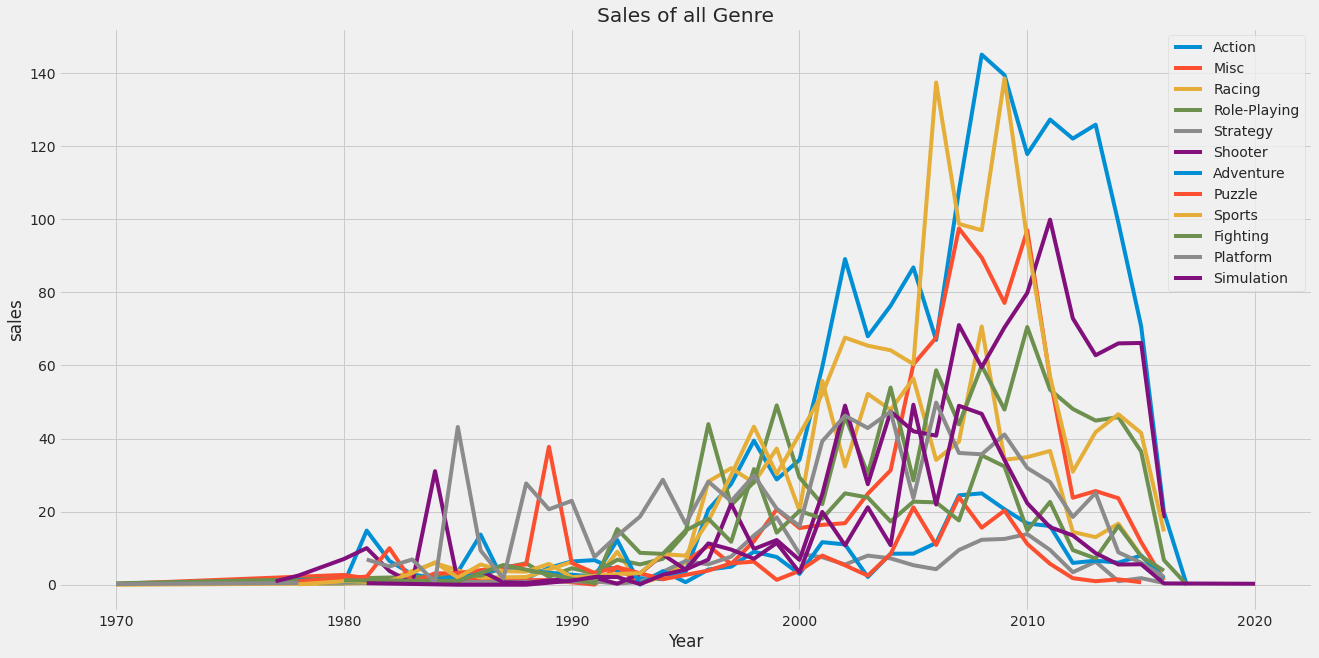

In [100]:
#Visualize the data
plt.figure(figsize=(20,10))
for single_genre in dataframe_dict:
  plt.plot(dataframe_dict[single_genre]['Year'], dataframe_dict[single_genre]['Global_Sales'], label=single_genre)
plt.title(f"Sales of all Genre")
plt.xlabel('Year')
plt.ylabel('sales')
plt.legend()
plt.show()

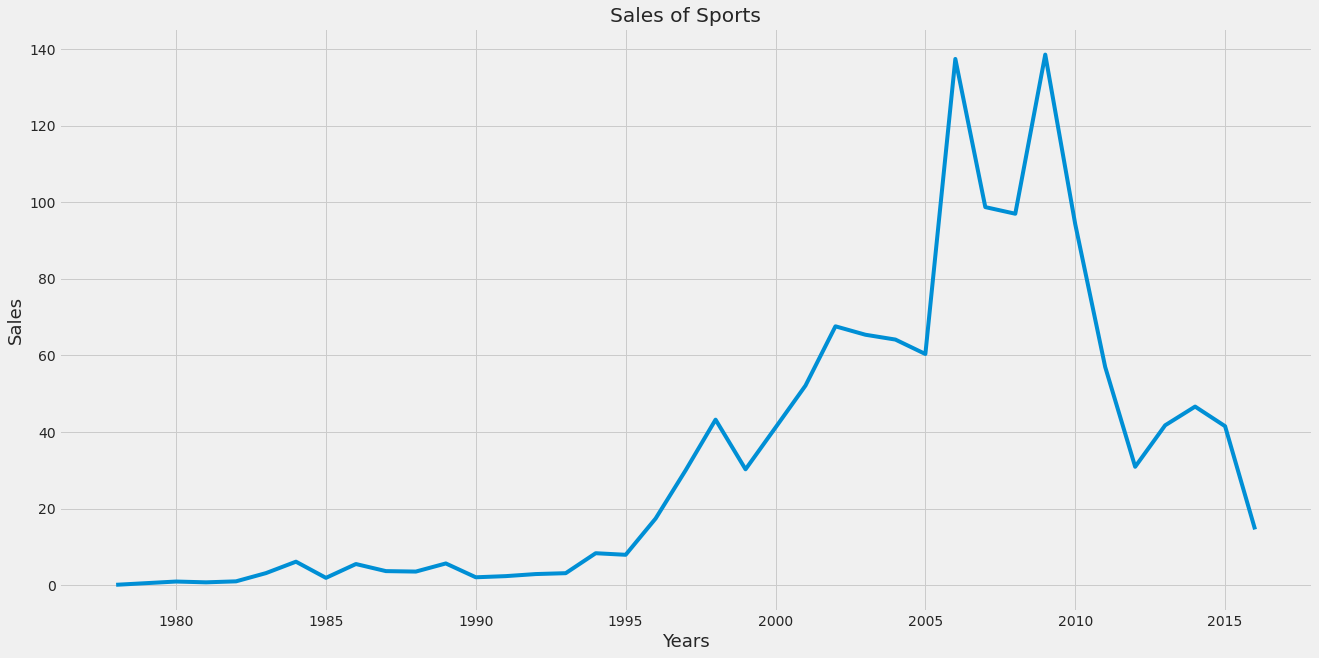

In [103]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
genre = 'Sports'
#Get the stock quote
df = dataframe_dict[genre]

#Show the data
df
#Get the number of rows and columns in the data set
df.shape

plt.figure(figsize=(20,10))
plt.title("Sales of "+genre)
plt.plot(df['Year'],df['Global_Sales'])
plt.xlabel('Years', fontsize=18)
plt.ylabel('Sales', fontsize=18)
#We show the plot
plt.show()

[array([0.        , 0.00614295])]
[0.0046252800462527974]

29/29 [==============================] - 3s 4ms/step - loss: 0.0864


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


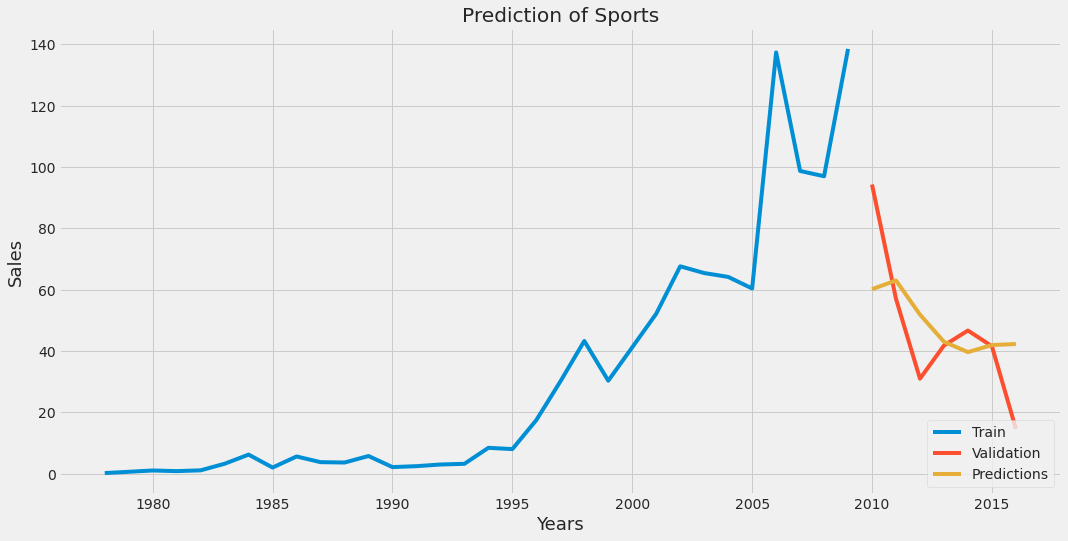

In [105]:
data = df.filter(['Global_Sales'])

#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * 0.8 )

training_data_len

#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

#Create the training data set 
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []
#We create a loop
for i in range(2, len(train_data)):
  x_train.append(train_data[i-2:i, 0]) #Will conaint 2 values (0-1)
  y_train.append(train_data[i, 0]) #Will contain the 61th value (2)
  if i <= 2:
    print(x_train)
    print(y_train)
    print()


#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

#Create the testing data set
#Create a new array containing scaled values from index 1738 to 2247
test_data = scaled_data[training_data_len - 2:]
#Create the data set x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(2, len(test_data)):
  x_test.append(test_data[i-2:i, 0])

#Convert the data to a numpy array
x_test = np.array(x_test)

#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

#Get the model's predicted price values for the x_test data set
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
predictions

#Evaluate model (get the root mean quared error (RMSE))
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title("Prediction of "+genre)
plt.xlabel('Years', fontsize=18)
plt.ylabel('Sales', fontsize=18)
plt.plot(df.loc[train.index]['Year'],train['Global_Sales'])
plt.plot(df.loc[valid.index]['Year'],valid[['Global_Sales', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc='lower right')
plt.show()